<a href="https://colab.research.google.com/github/seungmei/QNS/blob/main/Qiskit_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit
https://quantum.ibm.com/
1. map the problem to a quantm-native format.
2. optimize the circuits and operators.
3. execute using a quantum primitive function.
4. analyze the results.

- quantum circuits: native format in which to represent quantum instructions
- operators represent the observables to be measured.
- When creating a circuit, create a new **QuantumCircuit** object

# Qiskit Patterns
1. Map problem to quantum circuits and operators
2. Optimize circuits for target hardware
3. Execute on target hardware
4. Postprocess results

## Installing qiskit packages

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.3
    Uninstalling pydantic-2.11.3:
      Successfully uninstalled pydantic-2.11.3


In [ ]:
pip install 'qiskit[visualization]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=101729179b1839727156faaf66b3ee10194c02961c06b1f3fc63a1a492f59965
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.1 MB/s eta 0:00:00


In [ ]:
import qiskit
print(qiskit.__version__)

2.0.0


## Login IBM Quantum Platform

In [ ]:
# API 토큰을 사용하여 IBM Quantum 계정에 로그인하자
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel = "ibm_quantum",#ibm cloud
    token = 'ecff1878e6d9bd538eee346d380ffe6d238a94ca2200857e96ebdc6cfd37068edb1f793737827bdbd40ce80248d3e609653e47c734b01862726819f5f68d8130'
)

In [ ]:
#API 토큰을 안전하게 저장하고 로그인
QiskitRuntimeService.save_account(
   channel='ibm_quantum',
   token = 'ecff1878e6d9bd538eee346d380ffe6d238a94ca2200857e96ebdc6cfd37068edb1f793737827bdbd40ce80248d3e609653e47c734b01862726819f5f68d8130',
   overwrite=True
)

## Map the problem to a quantum-native format

https://www.youtube.com/watch?v=93-zLTppFZw

### 2-qubit Bell state

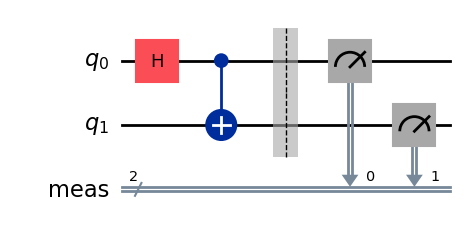

In [ ]:
# 2-qubit Bell state
from qiskit import QuantumCircuit, QuantumRegister

qubits = QuantumRegister(2, name='q') # 두 개의 큐비트를 포함하는 양자 register q를 생성
circuit = QuantumCircuit(qubits) # 양자회로 생성

# 게이트 적용
q0, q1 = qubits
circuit.h(q0) #q0에 하다마르 게이트
circuit.cx(q0, q1) #q0를 제어 큐비트, q1을 타겟 큐비트로 하는 CNOT 게이트 적용
## q0이 |0> 이면 q1은 변화없음, q0이 |1> 이면 q1의 상태가 반전됨.
circuit.measure_all() # 모든 큐비트를 측정
circuit.draw("mpl") #mpl 모드를 사용하여 회로를 그래픽으로 출력

얽힘 상태를 생성하는 양자회로
초기 상태 |00>
-> Hadamard 게이트 적용 후 상태:
1/sqrt(2) *(|0> + |1>) tensor product |0>
--> CNOT 적용 후 상태:
1/sqrt(2) *(|00> + |11>) (Bell state)
; 00또는 11이 각각 50%의 확률로 나옴.

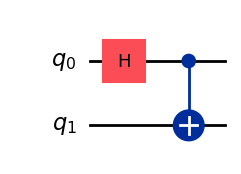

In [ ]:
# 양자 register 생성하지 않고 바로 Bell-state 만들기

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

**양자 회로를 만들 때 어떤 데이터가 리턴될까**
1. **probability dist** for a set of qubits you choose to measure
2. **expectation value** of an observable.

### Measuring expectation values by using qiskit_quantum_info submodule, which is specified by using operators
⟨Z1 Z0⟩: expectation values of qubit 1 and 0. if the state is entagled, then the measurement of it should be 1.

In [ ]:
# Pauli operator
# set up six different observables
from qiskit.quantum_info import Pauli
# I = [[1, 0], [0, 1]] : does nothing
# X = [[0, 1], [1, 0]] : bit-flip
# Y = [[0, -i], [i, 0]] : bit&phase flip
# Z = [[1, 0], [0, -1]] : phase flip
# Pauli Z matrix는 z축 기준으로 회전하는 것과 같다.

ZZ = Pauli('ZZ') #has non-zero expectation value #Z⊗Z
ZI = Pauli('ZI') #single #Z on qubit 0
IZ = Pauli('IZ') #single #Z on qubit 1
XX = Pauli('XX') #has non-zero expectation value #X⊗X
XI = Pauli('XI') #single #X on qubit 0
IX = Pauli('IX') #single #X on qubit 1

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [ ]:
# Set up six different observables.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

X∣0⟩=∣1⟩,X∣1⟩=∣0⟩,

Z∣0⟩=∣0⟩,Z∣1⟩=−∣1⟩,

Y∣0⟩=i∣1⟩,Y∣1⟩=−i∣0⟩

when applied to superpositions?

∣ψ⟩=α∣0⟩+β∣1⟩

X∣ψ⟩=α∣1⟩+β∣0⟩

Z∣ψ⟩=α∣0⟩−β∣1⟩

Y∣ψ⟩=iα∣1⟩−iβ∣0⟩

In [ ]:
# execute on the backend
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc]* len(observables), observables)
job.result() # expectation values of the six operator

EstimatorResult(values=array([ 1.        ,  0.04492188,  0.04492188,  1.        , -0.05078125,
       -0.05078125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.002047589, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00068678, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9979820251464844, 'simulator_metadata': [{'time_taken': 0.002047589, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000

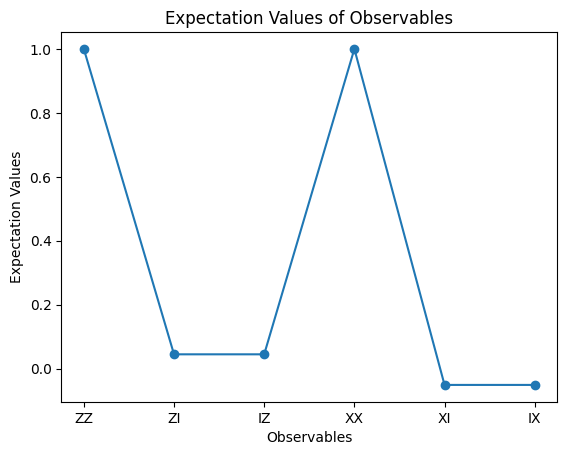

In [ ]:
# post-process
## <pi+|zz|pi+>
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.title('Expectation Values of Observables')
plt.show()

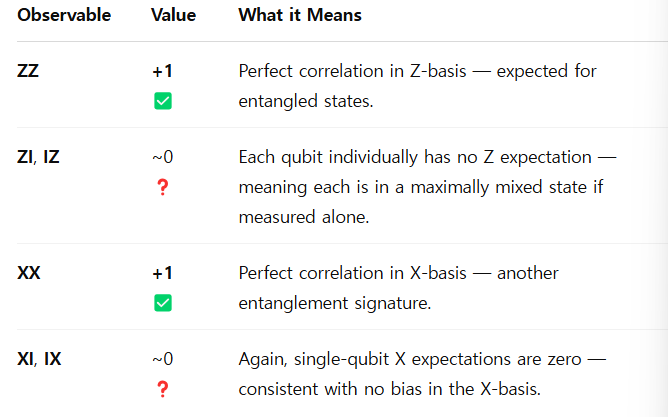

## optimize the circuits and operators
When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that you obtain the best results possible by reducing the effects of error and noise.

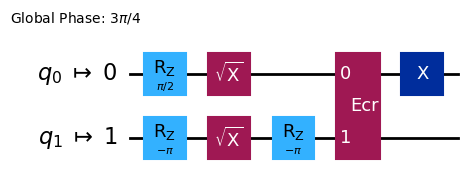

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

## Execute using the quantum primitives
Quantum computers can produce random results, so you usually collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable by using the Estimator class. Estimator is one of two primitives; the other is Sampler, which can be used to get data from a quantum computer. These objects possess a run() method that executes the selection of circuits, observables, and parameters (if applicable), using a primitive unified bloc (PUB).

In [ ]:
# Construct the Estimator instance.

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: czyv7gpqnmvg008w5af0


In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [ ]:
# fake_provider is only possible for a small circuit
# Use the following code instead if you want to run on a simulator:

from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

## Analyze the results
The analyze step is typically where you might postprocess your results using, for example, measurement error mitigation or zero noise extrapolation (ZNE). You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem. For this example, plot each of the expectation values that were measured for our circuit.

The expectation values and standard deviations for the observables you specified to Estimator are accessed through the job result's PubResult.data.evs and PubResult.data.stds attributes. To obtain the results from Sampler, use the PubResult.data.meas.get_counts() function, which will return a dict of measurements in the form of bitstrings as keys and counts as their corresponding values. For more information, see Get started with Sampler.


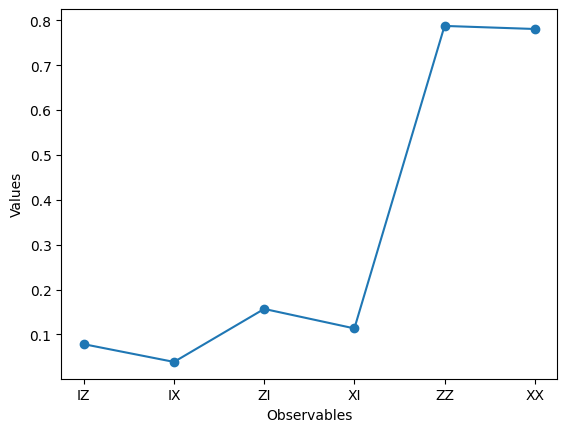

In [ ]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

## Scale to large numbers of qubits

### n-qubit GHZ state
creates

∣GHZ
n
​
 ⟩=
2
​

1
​
 (∣00…0⟩+∣11…1⟩)

 It uses the Qiskit patterns workflow and ends by measuring the expectation value
⟨Z0Zi⟩ for each qubit.

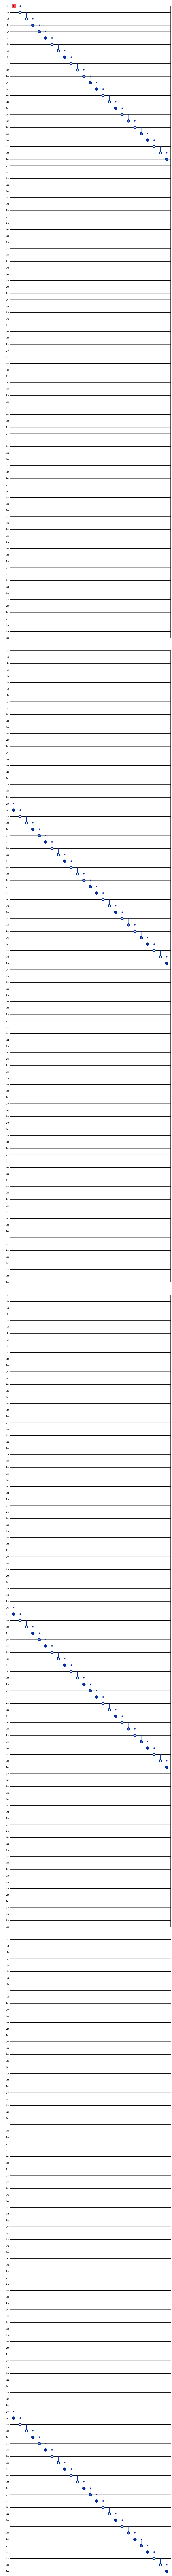

In [ ]:
#step1: map the problem to circuits and operators

def get_qc_for_n_qubit_GHZ_state(n):
  qc = QuantumCircuit(n)
  qc.h(0)                     # Put qubit 0 into superposition
  for i in range(n-1):        # 0 ~ stop-1
    qc.cx(i, i+1)            # Cascade CNOTs to entangle all qubits
  return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

Next, map to the operators of interest. This example uses the ZZ operators between qubits to examine the behavior as they get farther apart. Increasingly inaccurate (corrupted) expectation values between distant qubits would reveal the level of noise present.

In [ ]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z'+'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)] #?
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [ ]:
#step 2: optimize the problem for quanutm exexution
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_brisbane" #127 qubits
service = QiskitRuntimeService()
backend = service.backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc) #pass the quantum circuit
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

Submit the job and enable error suppression by using a technique to reduce errors called dynamical decoupling.
The resilience level specifies how much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times.
For further explanation of the options set in the following code, see Configure error mitigation for Qiskit Runtime.

In [ ]:
# step 3: initialize an estimator that takes in the backend, execute on the backend
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions() # option 객체 생성. estimator를 통과시킬 수 있음.
options.resilience_level = 1 # sets how much error mitigation will be applied
options.dynamical_decoupling.enable = True #technique to fight decoherance(quantum noise over time)
options.dynamical_decoupling.sequence_type = "XY4" #XY4: common balanced sequence good for reducing dephasing noise

estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

czyvksf6rr3g008mhm00


In [ ]:
# post-process and plot
job_id = 'czyvksf6rr3g008mhm00'
service = QiskitRuntimeService()


job = service.job(job_id)

After the job completes, plot the results and notice that
⟨Z0Zi⟩  decreases with increasing
i, even though in an ideal simulation all
⟨Z0Zi⟩ should be 1.

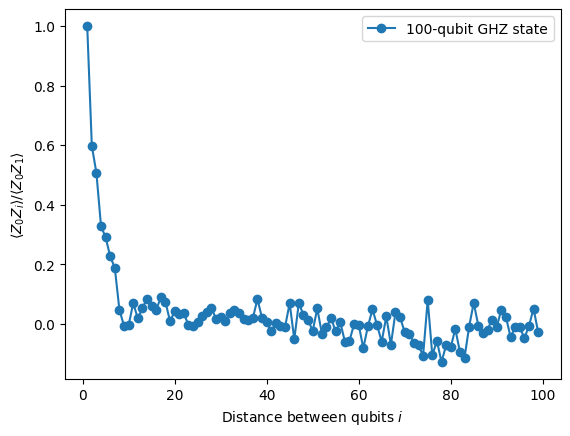

In [ ]:
import matplotlib.pyplot as plt

data = list(range(1, len(operators)+1))
result = job.result()[0]
values = result.data.evs #expectation values
values = [v / values[0] for v in values]

plt.plot(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()

## Primitives
https://youtu.be/35ykEg3fG4c?si=4SojNO_um51Qc9bL

https://www.nature.com/articles/s41586-023-06096-3

* primitive: the smallest processing instruction for a given abstraction level
* estimator primitive: computes expectatoin values of observables with the respective states prepared by quantum circuits.
* sampler primitive: returns shot by shot bit strings sampled from the probability dist of the quantum state prepared on the device.

noise가 있기 때문에 0 string으로 시작하여 0 string 으로 끝내고 싶어도 prob 이 그렇게 나오지 않을 가능성이 높다.

### tranvserse field Ising model to demo primitives
- Ising model: 모든 스핀을 한 축으로만 고정시킨 것.
- H: interaction btn spins Zi Zj
  - X field: perpendicular direction to interaction btn spins Zi, Zj
- first-order trotterzation: Rzz gate, Rx gate

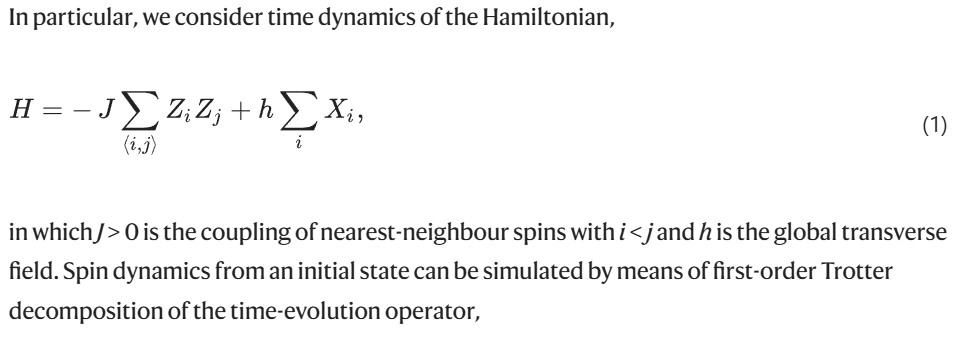

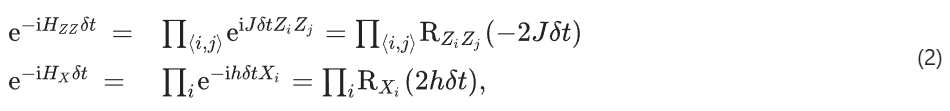

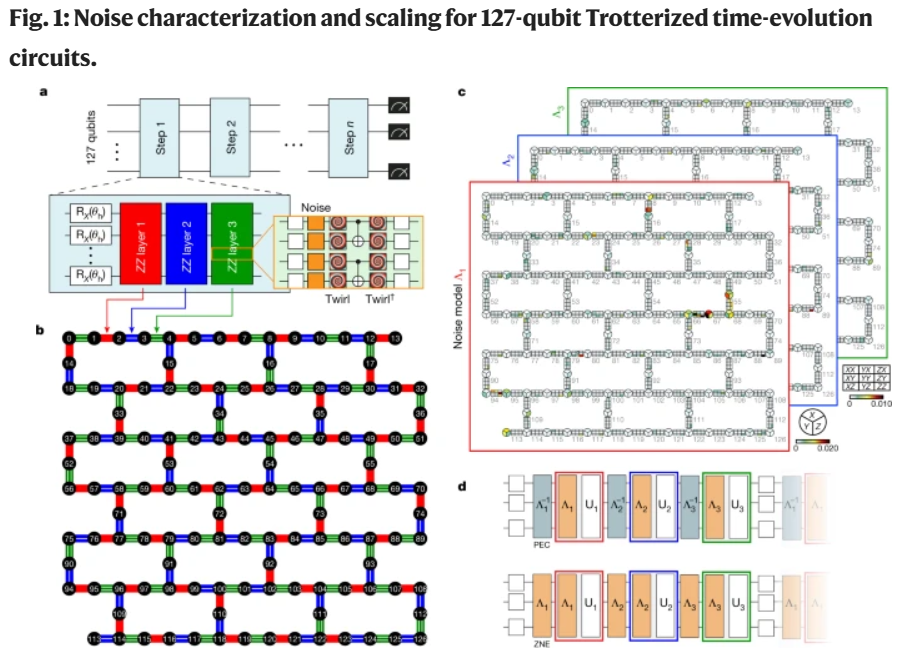

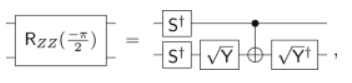

R
ZZ
​
 (θ)=e
−i
2
θ
​
 Z⊗Z

entangles two qubtis, phase shifts, very common in trotter steps when simulating time evolution.
 Z: Pauli Z marix
 Z⊗Z: acting on two qubits together
 ɵ: rotation angle

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np

SYGate = UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")

# 시간에 따라 quantum system이 바뀌는 것을 time evolution이라고 함.
# time evolution을 푸는 식이 수학적으로 매우 복잡하기 때문에, smaller step으로 쪼갠다.
# 이를 Trotter Step이라고 한다.
def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits=0, trotter_barriers = False, layer_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)

    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()

    return qc

def add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    if layer_barriers:
        qc.barrier()
    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    if layer_barriers:
        qc.barrier()
    # Rx gate를
    qc.rx(rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()

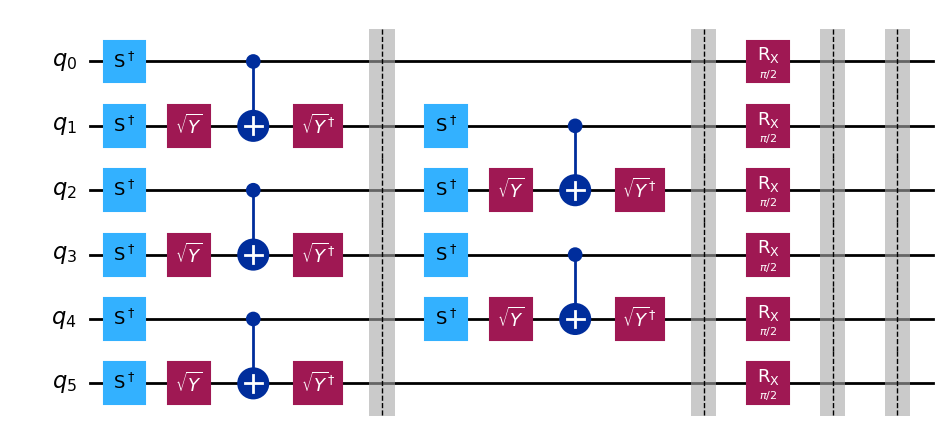

In [ ]:
num_qubits = 6
num_trotter_steps = 1
rx_angle = 0.5 * np.pi

qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
qc.draw(output='mpl', fold=-1)

### Demo: Sampler

In [ ]:
def append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = False, layer_barriers = False):
    for trotter_step in range(num_trotter_steps):
        add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()

def add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
    # Note after filming:
    # I constructed the inverse by hand here
    # But you could also use QuantumCircuit.inverse() to do this more efficiently
    qc.rx(-rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()
    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
        qc.s([i, i+1])
    if layer_barriers:
        qc.barrier()
    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
        qc.s([i, i+1])
    if layer_barriers:
        qc.barrier()

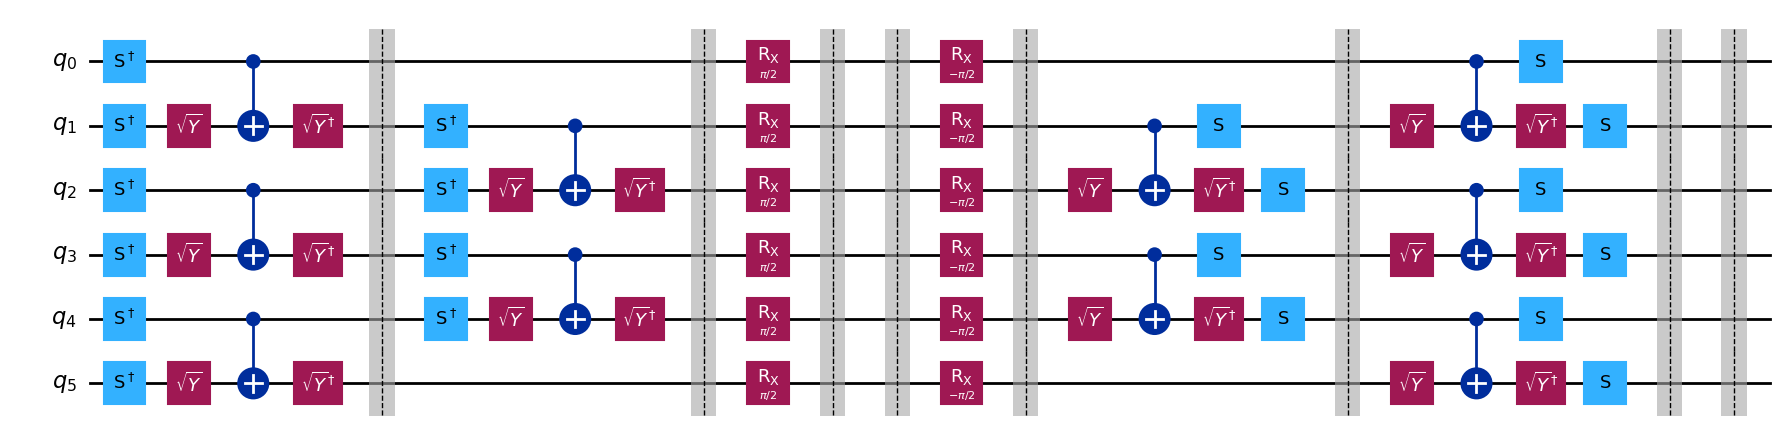

In [ ]:
append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
qc.draw(output='mpl', fold=-1)
#inverted properly
#entangled 되어 있으면 역연산을 하는 이유는 measure 다시 용이하게 하기 위해

In [ ]:
# step 1: Map the problem to circuits and observables
max_trotter_steps = 10
num_qubits = 100
measured_qubits = [49, 50]

qc_list = []

for trotter_step in range(max_trotter_steps):
  qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits=len(measured_qubits), trotter_barriers=False, layer_barriers=False)
  append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
  qc.measure(measured_qubits, list(range(len(measured_qubits))))
  qc_list.append(qc)

In [ ]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

backend_name = "ibm_brisbane"
service = QiskitRuntimeService()
backend = service.backend(backend_name)

# Transpile the list of circuits
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Bind the sampler to the session using the 'mode' parameter
sampler = Sampler(mode=backend)

# Configure dynamical decoupling
# ?
# qubits를 계속 active하게 만들기 with special pulse sequence -> qubits이 noise 때문에 drift하게 하지 않기 위해
sampler.options.dynamical_decoupling.enable = True #technique to fight decoherance(quantum noise over time) # correction pulses를 insert한다. qubits의 decoherence를 막기 위해서
sampler.options.dynamical_decoupling.sequence_type = "XY4" #XY4: common balanced sequence good for reducing dephasing noise
#sampler.options.execution.dynamical_decoupling.enable = True
#sampler.options.execution.dynamical_decoupling.sequence_type = "XY4"

# Run the job
job = sampler.run(qc_transpiled_list)

print("Job ID:", job.job_id())

Job ID: czyftah6rr3g008mfdeg


In [ ]:
# step 4: post-processing and plotting
job_id = 'czyftah6rr3g008mfdeg'
job = service.job(job_id)

survival_probability_list = []
for trotter_step in range(max_trotter_steps):
  try:
    data = job.result()[trotter_step].data
    survival_probability_list.append(data.c.get_counts()['0' * len(measured_qubits)] / data.c.num_shots)
  except:
    survival_probability_list.append(0)

- bitstring:
  000 all zeros --> 3 bit stirng
  101 mixed
  1101 --> 4 bit bitstring

- 2Q = two-qubit gates(e.g. CNOT, Rzz)
  - more error-prone than single-qubit gate
- Gate Depth: how many layers of gates are applied in sequence
  - more depth ==> more chances for noise or decoherence to mess up the results
- survival prob: how often all-0 bitstring happens after running the circuit.


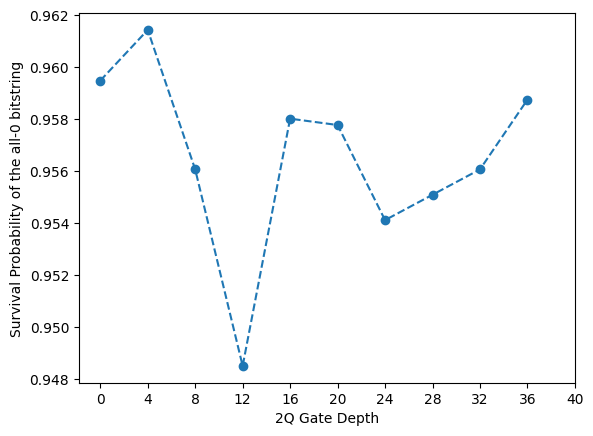

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(0, 4 * max_trotter_steps, 4)), survival_probability_list, '--o')
plt.xlabel('2Q Gate Depth')
plt.ylabel('Survival Probability of the all-0 bitstring')
plt.xticks(np.arange(0, 44, 4))
plt.show()

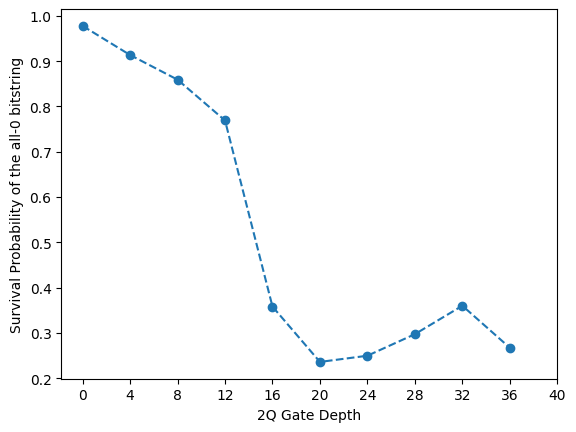

### Estimator
a tool used to calculate **the expectation value of an observable** (like Pauli operator) with repect to a quantum state prepared by a circuit.


In [ ]:
# step 1 : Mapping the problem
from qiskit.circuit import Parameter
rx_angle = Parameter("rx_angle")
trotter_steps = 2
qc = generate_1d_tfim_circuit(num_qubits, trotter_steps, rx_angle)

from qiskit.quantum_info import SparsePauliOp

middle_index = num_qubits // 2
# ? middle + 1 index에만 Pauli-Z matrix를 적용할까?
observable = SparsePauliOp("I" * middle_index + "Z" + "I" * (middle_index-1))

why only measure the middle qubit?

이와 같은 quantum simulation에서는 (TFIM(transvserse field Ising model)) symmetry를 발견할 수 있는 center qubit을 measure?

In [ ]:
# step 2: optimize the circuit
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend(name='ibm_brisbane')

# Note after filming:
# `transpile` will be deprecated soon
# so in the future, use `generate_preset_pass_manager` to achieve similar functionality
qc_transpiled = transpile(qc, backend=backend, optimization_level=1)
observable = observable.apply_layout(qc_transpiled.layout)

In [ ]:
# step 3 : execute on quantum hardware
from qiskit_ibm_runtime import EstimatorV2, EstimatorOptions

min_rx_angle = 0
max_rx_angle = np.pi/2
num_rx_angle = 12
rx_angle_list = np.linspace(min_rx_angle, max_rx_angle, num_rx_angle)

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = EstimatorV2(mode=backend, options=options)

job = estimator.run([(qc_transpiled, observable, rx_angle_list)])
print(job.job_id())

czyftvv6rr3g008mfdg0


(-0.1, 1.1)

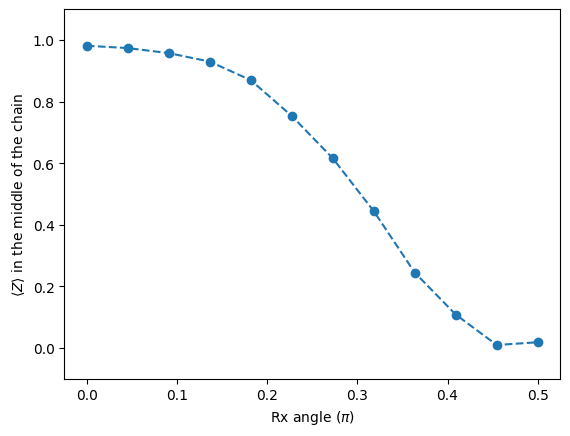

In [ ]:
# step 4: post-processing and plotting
job_id = "czyftvv6rr3g008mfdg0"
job = service.job(job_id)

exp_val_list = job.result()[0].data.evs

# middle qubit이 얼마나 z 방향(|0>, |1> 상태)에 있는지를 나타냄.
plt.plot(rx_angle_list / np.pi, exp_val_list, '--o')
plt.xlabel(r'Rx angle ($\pi$)')
plt.ylabel(r'$\langle Z \rangle$ in the middle of the chain')
plt.ylim(-0.1, 1.1)
# rx_angle = 0 : qubit stays at |0>
# 0 < rx_angle increases : qubit rotates away from |0>
# rx_angle=pi : the qubit flips to |1>
# rx_angle =pi/2

## Dynamic Circuits

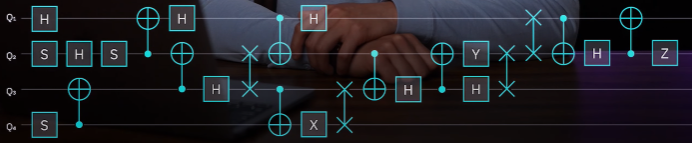

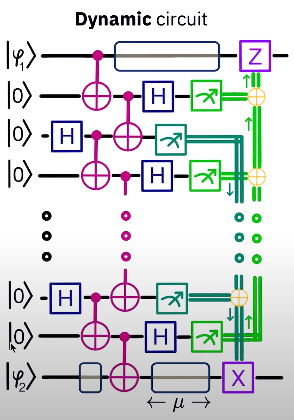

### Long-range CNOT gate teleportation using dynamic circuits

In [ ]:
# step 1: map the problem to circuits and operators
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.classical import expr

def get_dynamic_CNOT_circuit(num_qubit):
    """
    (1) 1D chain of nearest neighbors
    (2) 0th qubit is the control, and the last qubit (num_qubit-1) is the target
    (3) The control qubit starts in the + state
    """
    # ancilla qubit: extra qubit used not to store main data, but to help with computation like intermediate steps, error correction or measurement-based control
    num_ancilla = num_qubit - 2
    num_ancilla_pair = int(num_ancilla / 2)

    qr = QuantumRegister(num_qubit)
    cr1 = ClassicalRegister(num_ancilla_pair, name="cr1") # The parity-controlled X gate
    cr2 = ClassicalRegister(num_ancilla - num_ancilla_pair, name="cr2") # The parity-controlled Z gate
    cr3 = ClassicalRegister(2, name="cr3") # For the final measurements on the control and target qubits
    qc = QuantumCircuit(qr, cr1, cr2, cr3)

    # Initialize the control qubit
    qc.h(0)
    qc.barrier()

    # Entangle the contorl qubit and the first ancilla qubit
    qc.cx(0,1)

    # Create Bell pairs on ancilla qubits
    # The first ancilla qubit in index 1
    for i in range(num_ancilla_pair):
        qc.h(2+2*i)
        qc.cx(2+2*i, 2+2*i+1)

    # Prepare Bell pairs on staggered ancilla and data qubits
    for i in range(num_ancilla_pair+1):
        qc.cx(1+2*i, 1+2*i+1)
    for i in range(1, num_ancilla_pair+2):
        qc.h(2*i-1)

    # Measurement on alternating ancilla qubits starting with the first one
    # Keep track of the parity for eventual conditional Z gate
    for i in range(1, num_ancilla_pair+2):
        qc.measure(2*i - 1, cr2[i-1])
        if i == 1:
            parity_control = expr.lift(cr2[i-1])
        else:
            parity_control = expr.bit_xor(cr2[i-1], parity_control)

    # Measurement on staggered alternating ancilla qubits starting with the second
    # Keep track of the parity of eventual conditional X gate
    for i in range(num_ancilla_pair):
        qc.measure(2*i + 2, cr1[i])
        if i == 0:
            parity_target = expr.lift(cr1[i])
        else:
            parity_target = expr.bit_xor(cr1[i], parity_target)

    with qc.if_test(parity_control):
        qc.z(0)

    with qc.if_test(parity_target):
        qc.x(-1)

    # Final measurements on the control and target qubits
    qc.measure(0, cr3[0])
    qc.measure(-1, cr3[1])

    return qc

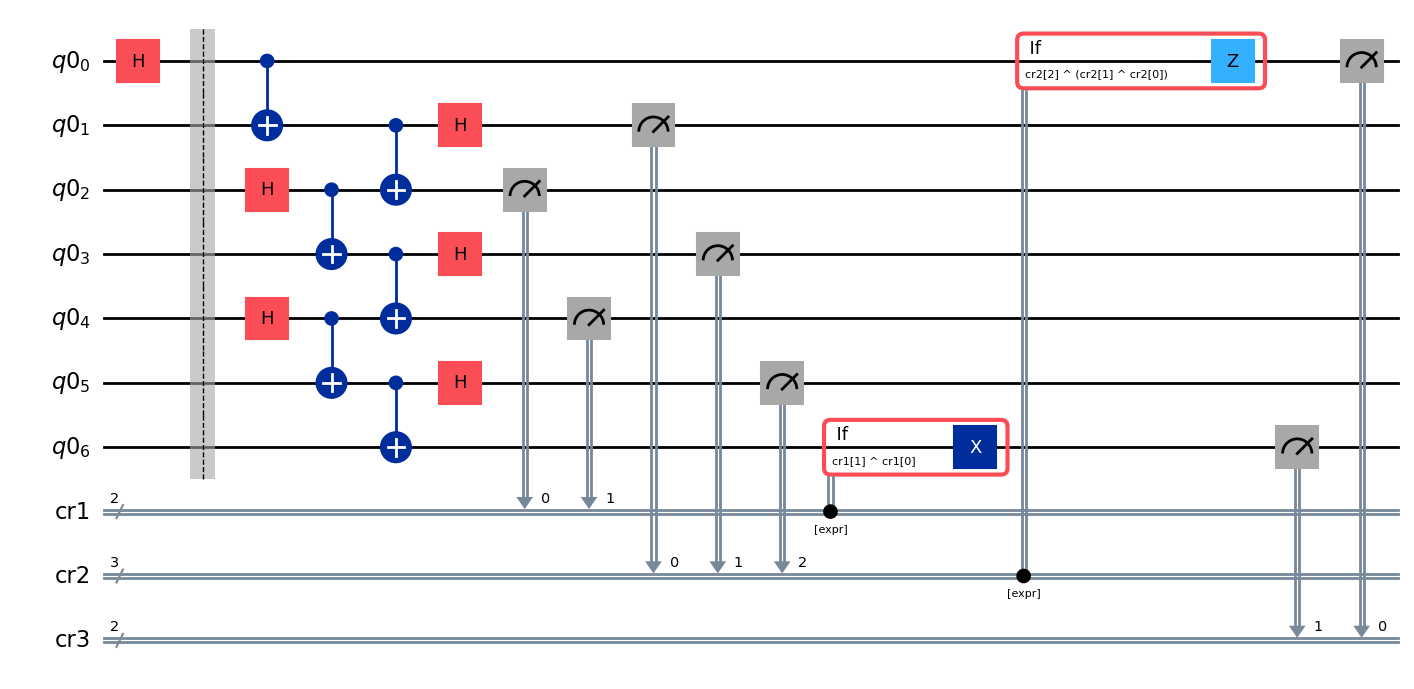

In [ ]:
qc = get_dynamic_CNOT_circuit(num_qubit=7)
qc.draw(output='mpl')

In [ ]:
max_num_qubit = 41

qc_list = []
num_qubit_list = list(range(7, max_num_qubit+1, 2))
for num_qubit in num_qubit_list:
    qc_list.append(get_dynamic_CNOT_circuit(num_qubit))

In [ ]:
# step 2: optimize the problem for quantum execution

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend(name='ibm_brisbane')
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled_list = pm.run(qc_list)

In [ ]:
# step 3: execute the circuit
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)
job = sampler.run(qc_transpiled_list)
print(job.job_id())

czyfvcnd8drg008hwt90


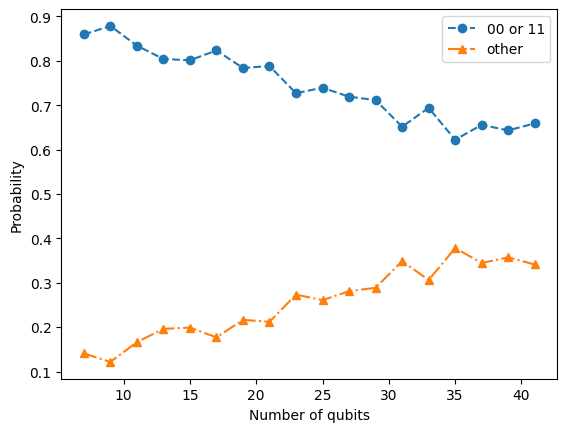

In [ ]:
# step 4: post-processing and plotting
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'czyfvcnd8drg008hwt90'

service = QiskitRuntimeService()
job = service.job(job_id)
result = job.result()

list_Bell = []
list_other = []
for i in range(0, len(qc_list)):
    data = result[i].data
    counts = data.cr3.get_counts()
    total_counts = data.cr3.num_shots

    prob_Bell = (counts['00'] + counts['11']) / total_counts

    list_Bell.append(prob_Bell)
    list_other.append(1-prob_Bell)

plt.plot(num_qubit_list, list_Bell, '--o', label='00 or 11')
plt.plot(num_qubit_list, list_other, '-.^', label='other')
plt.xlabel('Number of qubits')
plt.ylabel('Probability')
plt.legend()

### **

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)

service = QiskitRuntimeService() # IBM Quantum 서비스에 연결
backend = service.backend('ibm_brisbane')  # 실제 IBM 양자컴퓨터 중 ibm_brisbane을 선택
pass_manager = generate_preset_pass_manager(1, backend=backend) #최적화 레벨 1을 사용하여 백엔드에 맞춘 변환(Transpile) 수행. 물리적 큐비트 매핑 및 게이트 최적화
transpiled = pass_manager.run(circuit) #회로를 백엔드에 맞게 변환하여 transpiled에 저장

transpiled.draw('mpl', idle_wires = False) #idle_wires = False 옵션: 사용되지 않은 큐비트 숨김

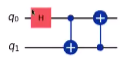

* qubits are assumed to be stay in the zero state.
* Hadamard gate : takes the state to the status of superposition
* CNOT gate (Controlled-Not gate) (which has (+) sign) : flip the second qubit zero to one if the first qubit is one.

## Transpilation terms
* pass: a standalone circuit or metadata transformation (an intrument)
* pass manager: a list of tranpiler passes grouped into a logical unit (an instrument section)
* staged pass manager: a list of pass managers, with each one representing a discrete stage of a transpilation pipeline (the conductor)

## Transpiler stages
1. Initialization
the circuit is prepared for transpilation
2. Layout
the abstract qubits of the circuit are mapped to physical qubits on the device.
3. Routing
swap gates are inserted to enable interactions btn qubits that are not physically connected.
4. Translation
the gates of the circuit are translated to the basis gate set of the device.
5. Optimization
the circuit is rewritten to minimize its depth (# of operations) to decrease the effect of errors.
6. Scheduling
delay instructions are added to align the circuit with the hardware's timing.

Scheduling을 하는 이유는 qubit에 single gate를 적용할 경우, mutiple lines of operations이 동시에 작동하기 때문에 hardware에 적용되는 timing을 조절해야한다.

## Simulation tools

In [ ]:
# run the sampler job locally using FakeMnilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)

# you can use a fixed seed to get fixed results/
options = {'simulator': {'seed_simulator:42'}}
sampler = Sampler(backend=fake_manila, options=options)

result = sampler.run([isa_qc]).result()

## Techniques for large circuits
~50+ qubits cannot be simulated.
1. Test smaller versions of circuit
2. Modify circuit so that it beomes classically simulatable : stabilizer circuit aka Clifford circuit

## Executing target hardware

In [ ]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService()

backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)

n_qubits = 127

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

sampler = Sampler(backend)
job = sampler.run([isa_circuit]) # running isa circuit
result = job.result()

### Estimator primitive

In [ ]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.tranpiler.preset_passmangers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
estimator = Estimator(backend)

n_qubits = 127

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuits = IQP(mat)
observable = SparsePauliOp('Z' * n_qubits)

pm =generate_preset_pass_manager(backend_backend, optimization_level=1)
isa_circuit = pm.run(circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)

job = estimator.run([isa_circuit, isa_observable])
reseult = job.result()

print(f' > expectation value:  {result[0].data.evs}')
print(f' > Metadata : {result[0].metadata}')